In [1]:
from google.colab import files

uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving results.csv to results.csv
Загружен файл results.csv


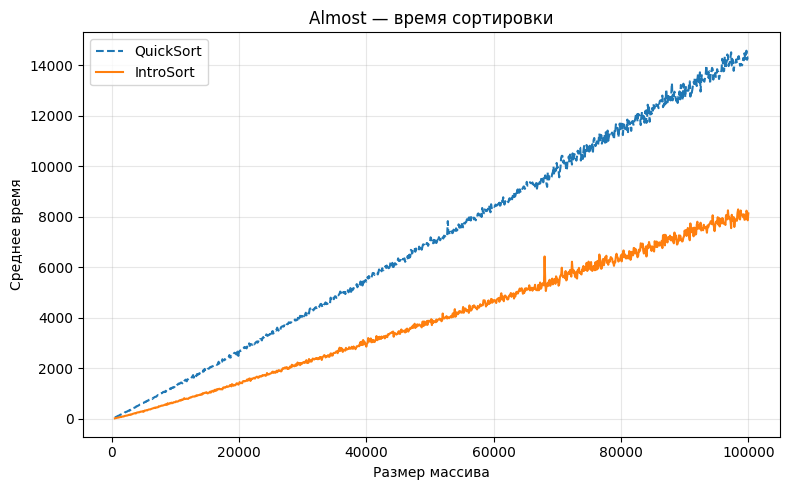

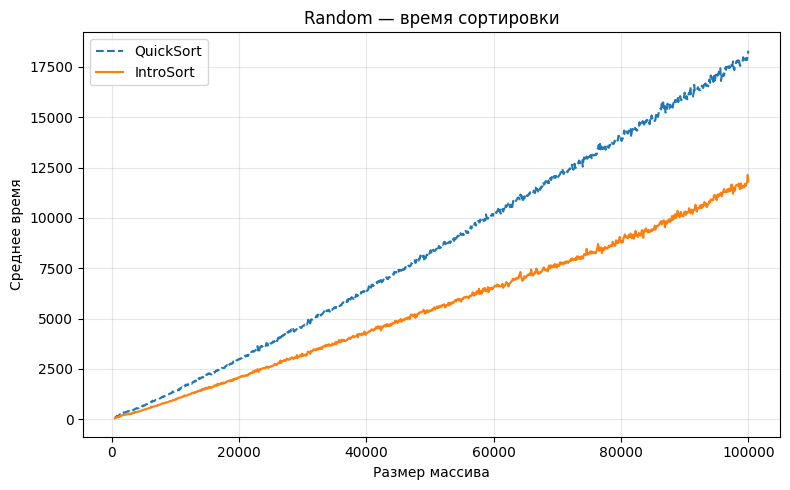

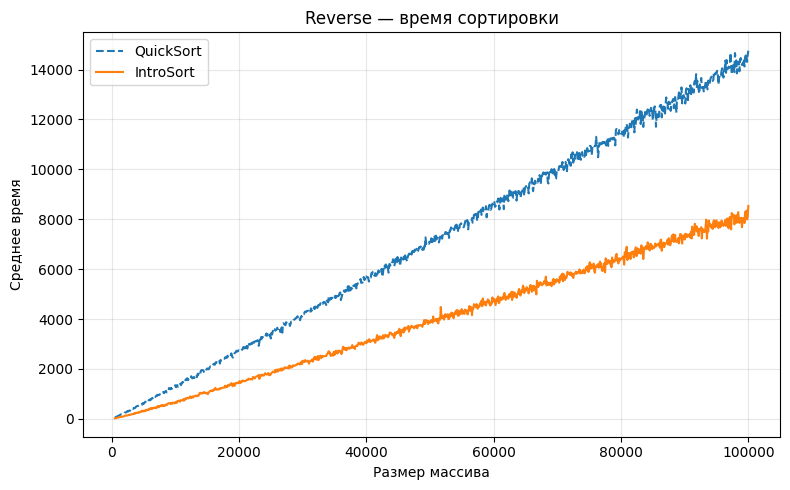

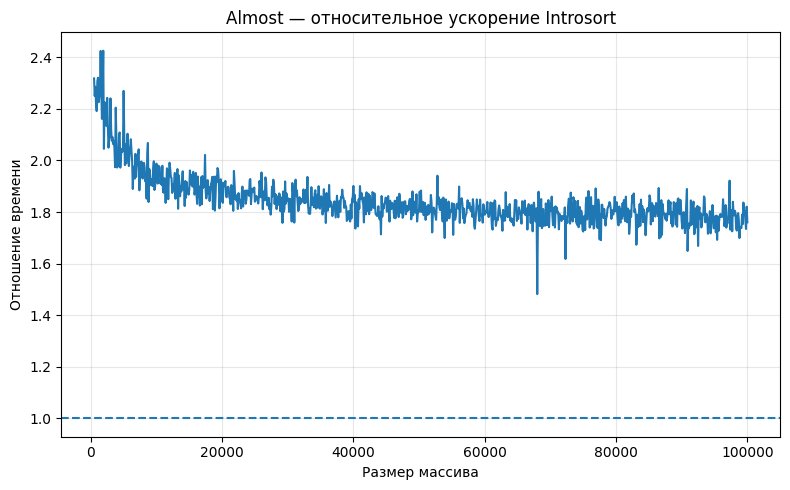

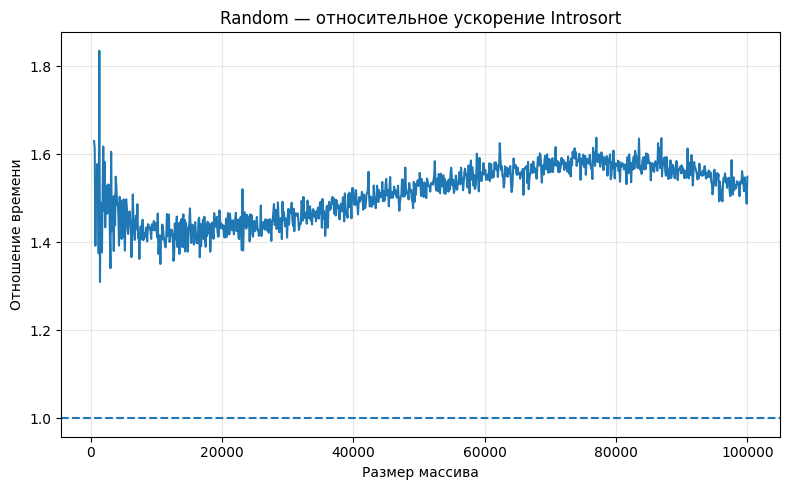

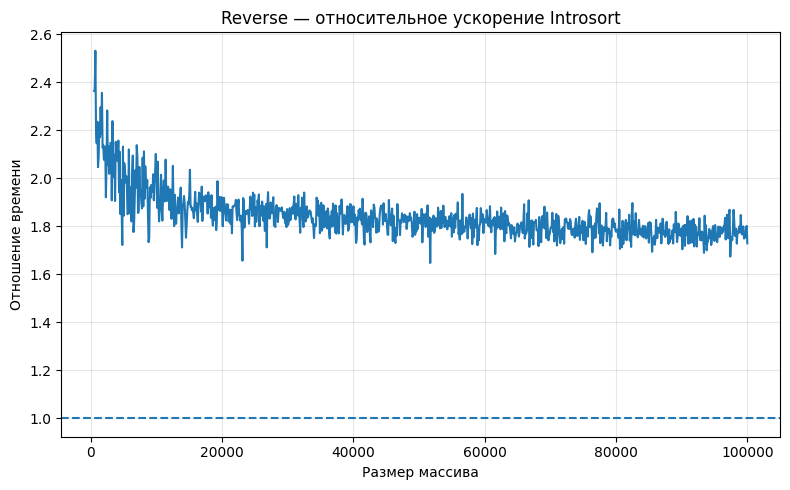

In [4]:
import io, pandas as pd, matplotlib.pyplot as plt

fn = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fn]))

time_col = next(c for c in df.columns if c.lower().startswith("time"))
if "ms" in time_col.lower():
    df["time_us"] = df[time_col] * 1000
else:
    df["time_us"] = df[time_col]

agg = df.groupby(['category', 'Algorithm', 'size'], as_index=False)['time_us'].median()

# 1 график
for cat in sorted(df['category'].unique()):
    sub = agg[agg['category'] == cat]
    sizes = sorted(sub['size'].unique())

    qs = sub[sub['Algorithm'] == 'QuickSort'].set_index('size').reindex(sizes)['time_us']
    intro = sub[sub['Algorithm'] == 'IntroSort'].set_index('size').reindex(sizes)['time_us']

    plt.figure(figsize=(8, 5))
    plt.plot(sizes, qs, '--', label='QuickSort')
    plt.plot(sizes, intro, label='IntroSort')
    plt.title(f'{cat} — время сортировки')
    plt.xlabel('Размер массива')
    plt.ylabel('Среднее время')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2 график
for cat in sorted(df['category'].unique()):
    sub = agg[agg['category'] == cat]
    sizes = sorted(sub['size'].unique())

    qs = sub[sub['Algorithm'] == 'QuickSort'].set_index('size').reindex(sizes)['time_us']
    intro = sub[sub['Algorithm'] == 'IntroSort'].set_index('size').reindex(sizes)['time_us']

    speedup = qs / intro  # > 1 значит IntroSort быстрее

    plt.figure(figsize=(8, 5))
    plt.plot(sizes, speedup, label='QuickSort / IntroSort')
    plt.axhline(1.0, linestyle='--')
    plt.title(f'{cat} — относительное ускорение Introsort')
    plt.xlabel('Размер массива')
    plt.ylabel('Отношение времени')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
